<a href="https://colab.research.google.com/github/kitsaws19/quantum/blob/main/Iris_Dataset_qsvm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random as rn
import numpy as np
from sklearn import model_selection, datasets, svm
from qiskit import QuantumCircuit, Aer, QuantumRegister, ClassicalRegister
from qiskit import execute
IBMQ.save_account('554935130320e98e089a1e743e077bae098a7c13a236f21c4d4f4c71896df5586202ae68a34de97f97d8c3cf4a853ff8832afe8fdec025dc1ff9372cf307d5e2')

import qiskit
import matplotlib.pyplot as plt
import copy

configrc.store_credentials:WARNING:2023-08-07 16:04:22,866: Credentials already present. Set overwrite=True to overwrite.


In [ ]:
! pip install qiskit-ibmq-provider

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 6.5 MB/s eta 0:00:00


In [ ]:
! pip install qiskit

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 12.7 MB/s eta 0:00:00
  Created wheel for qiskit: filename=qiskit-0.44.0-py3-none-any.whl size=7614 sha256=fd10af8051d984c74a28b974b4be8a427211fc7159f79ad208a5074409c3489f
  Stored in directory: /root/.cache/pip/wheels/45/90/00/70879ea1304b7b44cde9f737d2a819a87346d62666b3a89de1
Succ

In [ ]:
pip install qiskit-aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 22.5 MB/s eta 0:00:00


In [ ]:
iris=datasets.load_iris()
X=iris.data[0:100]
y=iris.target[0:100]
X_train, X_test, y_train, y_test=model_selection.train_test_split(X,y, test_size=0.33, random_state=42)

In [ ]:
print(y_train)

[0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1
 1 0 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 1]


In [ ]:
print(X_train)

[[5.2 3.4 1.4 0.2]
 [5.  2.3 3.3 1. ]
 [5.4 3.9 1.7 0.4]
 [5.6 3.  4.5 1.5]
 [6.7 3.1 4.4 1.4]
 [5.  3.2 1.2 0.2]
 [5.4 3.9 1.3 0.4]
 [5.  3.3 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.4 1.5 0.2]
 [5.7 3.  4.2 1.2]
 [5.2 3.5 1.5 0.2]
 [5.1 3.8 1.5 0.3]
 [5.5 2.4 3.7 1. ]
 [5.  3.  1.6 0.2]
 [6.  2.2 4.  1. ]
 [4.3 3.  1.1 0.1]
 [4.8 3.4 1.9 0.2]
 [4.6 3.1 1.5 0.2]
 [5.1 3.5 1.4 0.3]
 [4.4 3.  1.3 0.2]
 [4.4 2.9 1.4 0.2]
 [6.  2.9 4.5 1.5]
 [4.6 3.4 1.4 0.3]
 [5.6 2.9 3.6 1.3]
 [5.5 3.5 1.3 0.2]
 [5.5 2.5 4.  1.3]
 [6.3 3.3 4.7 1.6]
 [5.7 2.8 4.1 1.3]
 [6.5 2.8 4.6 1.5]
 [5.  3.5 1.6 0.6]
 [7.  3.2 4.7 1.4]
 [5.8 2.7 4.1 1. ]
 [5.1 3.8 1.6 0.2]
 [6.2 2.2 4.5 1.5]
 [5.9 3.  4.2 1.5]
 [6.2 2.9 4.3 1.3]
 [5.7 2.6 3.5 1. ]
 [4.5 2.3 1.3 0.3]
 [6.6 2.9 4.6 1.3]
 [5.3 3.7 1.5 0.2]
 [5.1 2.5 3.  1.1]
 [4.9 2.4 3.3 1. ]
 [6.6 3.  4.4 1.4]
 [5.2 4.1 1.5 0.1]
 [5.6 2.7 4.2 1.3]
 [5.2 2.7 3.9 1.4]
 [6.1 2.9 4.7 1.4]
 [5.4 3.  4.5 1.5]
 [4.9 3.6 1.4 0.1]
 [4.7 3.2 1.6 0.2]
 [4.9 3.  1.4 0.2]
 [6.9 3.1 4.

In [ ]:
print(X_train[0])

[5.2 3.4 1.4 0.2]


In [ ]:
N=4



In [ ]:
def feature_map(X):

    q=QuantumRegister(N)
    c=ClassicalRegister(1)

    qc=QuantumCircuit(q,c)

    for i, x in enumerate(X_train[0]):
      qc.rx(x,i)

    return qc, c


In [ ]:
qc, c=feature_map(X_train[0])

qc.measure(0,c)
qc.draw()

┌─────────┐┌─┐
q24_0: ┤ Rx(5.2) ├┤M├
       ├─────────┤└╥┘
q24_1: ┤ Rx(3.4) ├─╫─
       ├─────────┤ ║ 
q24_2: ┤ Rx(1.4) ├─╫─
       ├─────────┤ ║ 
q24_3: ┤ Rx(0.2) ├─╫─
       └─────────┘ ║ 
 c9: 1/════════════╩═
                   0

In [ ]:
def variational_circuit(qc, theta):
    for i in range(N-1):
      qc.cnot(i, i+1)
    qc.cnot(N-1,0)

    for i in range(N):
      qc.ry(theta[i],i)
    return qc

In [ ]:
def quantum_nn(x_theta,simulator=True):
  qc,c=feature_map(X_train[5])
  qc=variational_circuit(qc,np.random.rand(N))
  qc.measure(0,c)

  shots=1E4
  backend=Aer.get_backend('qasm_simulator')

  #if simulator ==False:
     # shots=5000
      #provider=IBMQ.load_account()
      #backend=provider.get_backend('ibm_kyiv')

  job= qiskit.execute(qc,backend, shots=shots)
  result = job.result()
  counts=result.get_counts(qc)

  return counts['1']/shots

In [ ]:


def loss(prediction, target):
  return (prediction-target)**2

In [ ]:
target=y_train[6]

In [ ]:
prediction=quantum_nn(X_train[5], np.random.rand(N))

In [ ]:
def gradient(X, y, theta):
  delta=0.01
  grad=[]
  for i in range(len(theta)):
    dtheta=copy.copy(theta)
    dtheta[i]+=delta

    pred1=quantum_nn(X, dtheta)
    pred2=quantum_nn(X,theta)

    grad.append((loss(pred1,y)-loss(pred2,y))/delta)

  return np.array(grad)

In [ ]:
def accuracy(X, y, theta):
  counter=0
  for X_i, y_i in zip(X,y):
    prediction=quantum_nn(X_i, theta)

    if prediction<0.5 and y_i==0:
      counter+=1

    elif prediction >=0.5 and y_i==1:
      counter+=1

  return counter/len(y)

In [ ]:
eta=0.05
loss_list=[]
theta=np.ones(N)
for i in range(5): # change values inside range to observe accuracy
  loss_tmp=[]
  for X_i, y_i in zip(X_train, y_train):

      prediction=quantum_nn(X_i, theta)
      loss_tmp.append(loss(prediction, y_i))
      theta=theta - eta * gradient (X_i,y_i, theta)

  loss_list.append(np.mean(loss_tmp))
  acc=accuracy(X_train,y_train, theta)

  print(f'{i} \t {loss_list[-1]:.3f} \t {acc:.3f}')

1 	 0.250 	 0.537
2 	 0.252 	 0.537
3 	 0.250 	 0.537
4 	 0.251 	 0.537


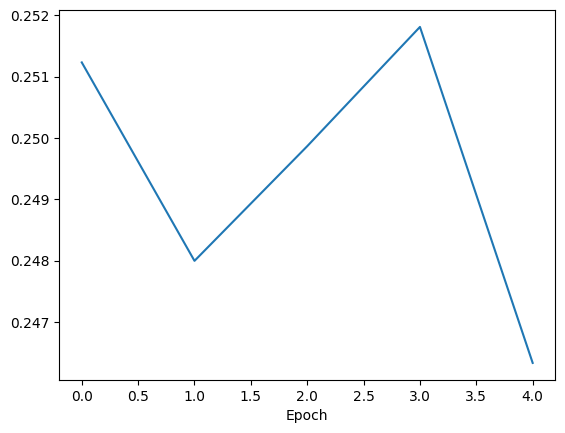

<function matplotlib.pyplot.show(close=None, block=None)>

In [ ]:
plt.plot(loss_list)
plt.xlabel('Epoch')
plt.show('Loss')
plt.show

In [ ]:
accuracy(X_test, y_test, theta)

0.42424242424242425

In [ ]:
clf=svm.SVC()
clf.fit(X_train,y_train)

SVC()

In [ ]:
print(clf.predict(X_test))
print(y_test)

[1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1]
[1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1]


In [ ]:
quantum_nn(X_test[0], theta)

0.5624

In [ ]:
y_test[6]

0